In [3]:
# %matplotlib widget
import os

import matplotlib.pyplot as plt
import numpy as np

In [4]:
def load_data(searchdir):
    res = []
    files = []
    for file in os.listdir(searchdir):
        files.append(searchdir + file)
    fs = sorted(files)
    # print(len(fs))
    for f in fs:
        if ".txt" not in f:
            None
        else:
            res.append(np.loadtxt(f, skiprows=1, delimiter=","))
    return res, fs

In [5]:
ions = ['He_I', 'He_II', 'He_III', 'C_I', 'C_II', 'C_III', 'N_I', 'N_II', 'N_III', 'O_I', 'O_II', 'O_III', 'F_I', 'F_II', 'F_III', 'Ne_I', 'Ne_II', 'Ne_III', 'Na_I', 'Na_II', 'Na_III', 'Mg_I', 'Mg_II', 'Mg_III', 'Al_I', 'Al_II', 'Al_III', 'Si_I', 'Si_II', 'Si_III', 'P_I', 'P_II', 'P_III', 'S_I', 'S_II', 'S_III', 'Cl_I', 'Cl_II', 'Cl_III', 'Ar_I', 'Ar_II', 'Ar_III', 'K_I', 'K_II', 'K_III', 'Ca_I', 'Ca_II', 'Ca_III', 'Sc_I', 'Sc_II', 'Sc_III', 'Ti_I', 'Ti_II', 'Ti_III', 'V_I', 'V_II', 'V_III', 'Cr_I', 'Cr_II', 'Cr_III', 'Mn_I', 'Mn_II', 'Mn_III', 'Fe_I', 'Fe_II', 'Fe_III', 'Co_I', 'Co_II', 'Co_III', 'Ni_I', 'Ni_II', 'Ni_III', 'Cu_I', 'Cu_II', 'Cu_III', 'Zn_I', 'Zn_II', 'Zn_III']

DONE


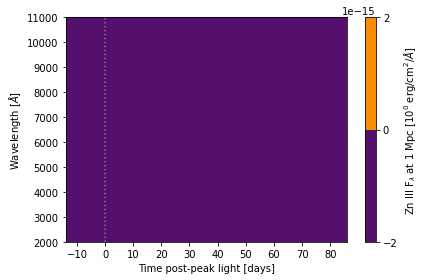

In [20]:
for i in ions:
    # print(i)
    spec = i + "/"
    d, f = load_data(spec)
    d = np.array(d)
    if np.max(d[:, :, 1]) == 0:
        exp = 0.0
    else:
        exp = np.floor(np.log10(1 / np.max(d[:, :, 1]))) + 1
    scale = 10**exp
    if plt.get_fignums():
        plt.clf()
    # scale = 1
    times = np.linspace(-14, int(f[-1][-13:-10]) - 14, len(d[:, 0, 0]))
    wlengths = d[0, :, 0]
    T, L = np.meshgrid(times, wlengths)
    # plt.xlim(2,60)
    plt.ylim(2000, 11000)
    plt.ylabel(r"Wavelength [$\AA$]")
    plt.xlabel("Time post-peak light [days]")
    plt.xticks([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80])
    plt.contourf(T, L, d[:, :, 1].T * scale, 100, cmap="inferno")
    # total = d[:, :, 3].T + d[:, :, 1].T
    # total = np.where(total == 0.0, 1e10, total)
    # quantity = d[:, :, 1].T * scale / total
    # quantity = np.where(np.isnan(quantity)==True, 0.0, quantity)
    # plt.contourf(T, L, quantity, 100, vmin=0, vmax=1, cmap="inferno")
    cbar = plt.colorbar()
    cbar.set_label(
        r"{species} F$_{l}$ at 1 Mpc [10$^{power}$ erg/cm$^2$/$\AA$]".format(
            species=spec[:-1].replace("_", " "), l="{\lambda}", power={-int(exp)}
        )
    )
    plt.plot([0, 0], [2000, 11000], color="gray", linestyle="dotted")
    plt.tight_layout()
    plt.savefig("spectrogram_{species}.eps".format(species=spec[:-1]))
    plt.savefig("spectrogram_{species}.pdf".format(species=spec[:-1]))
    plt.savefig("spectrogram_{species}.png".format(species=spec[:-1]))
print("DONE")
    # plt.show()